In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
data=pd.read_csv('House_Price.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [28]:
print('Data loaded Shape:', data.shape)


Data loaded Shape: (1460, 81)


In [29]:
print('Columns:', data.columns.tolist())

Columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
# Display summary statistics
print(data.describe())


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [15]:
# Display information about non-numeric columns
print(data.select_dtypes(include=['object']).describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA      

In [25]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

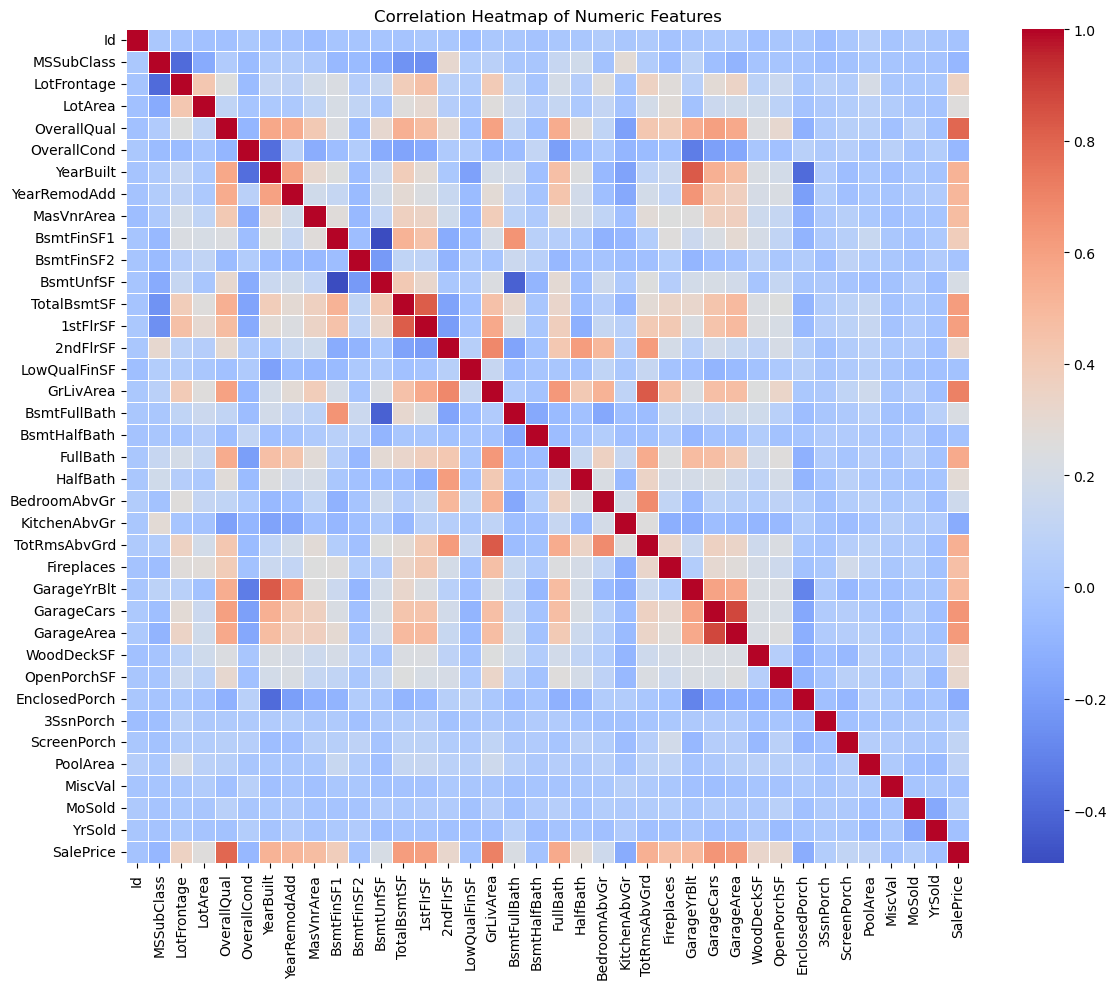

In [17]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


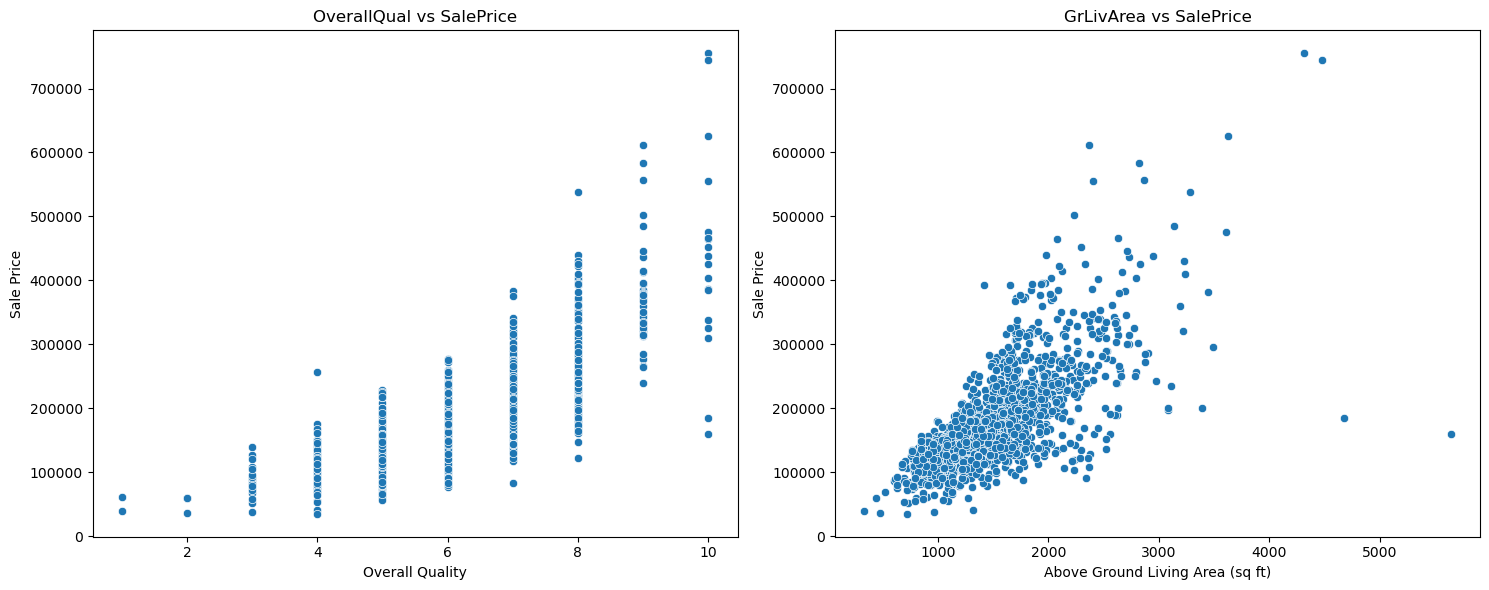

In [18]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for OverallQual vs SalePrice
sns.scatterplot(x='OverallQual', y='SalePrice', data=data, ax=ax1)
ax1.set_title('OverallQual vs SalePrice')
ax1.set_xlabel('Overall Quality')
ax1.set_ylabel('Sale Price')

# Scatter plot for GrLivArea vs SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, ax=ax2)
ax2.set_title('GrLivArea vs SalePrice')
ax2.set_xlabel('Above Ground Living Area (sq ft)')
ax2.set_ylabel('Sale Price')

plt.tight_layout()
plt.show()

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


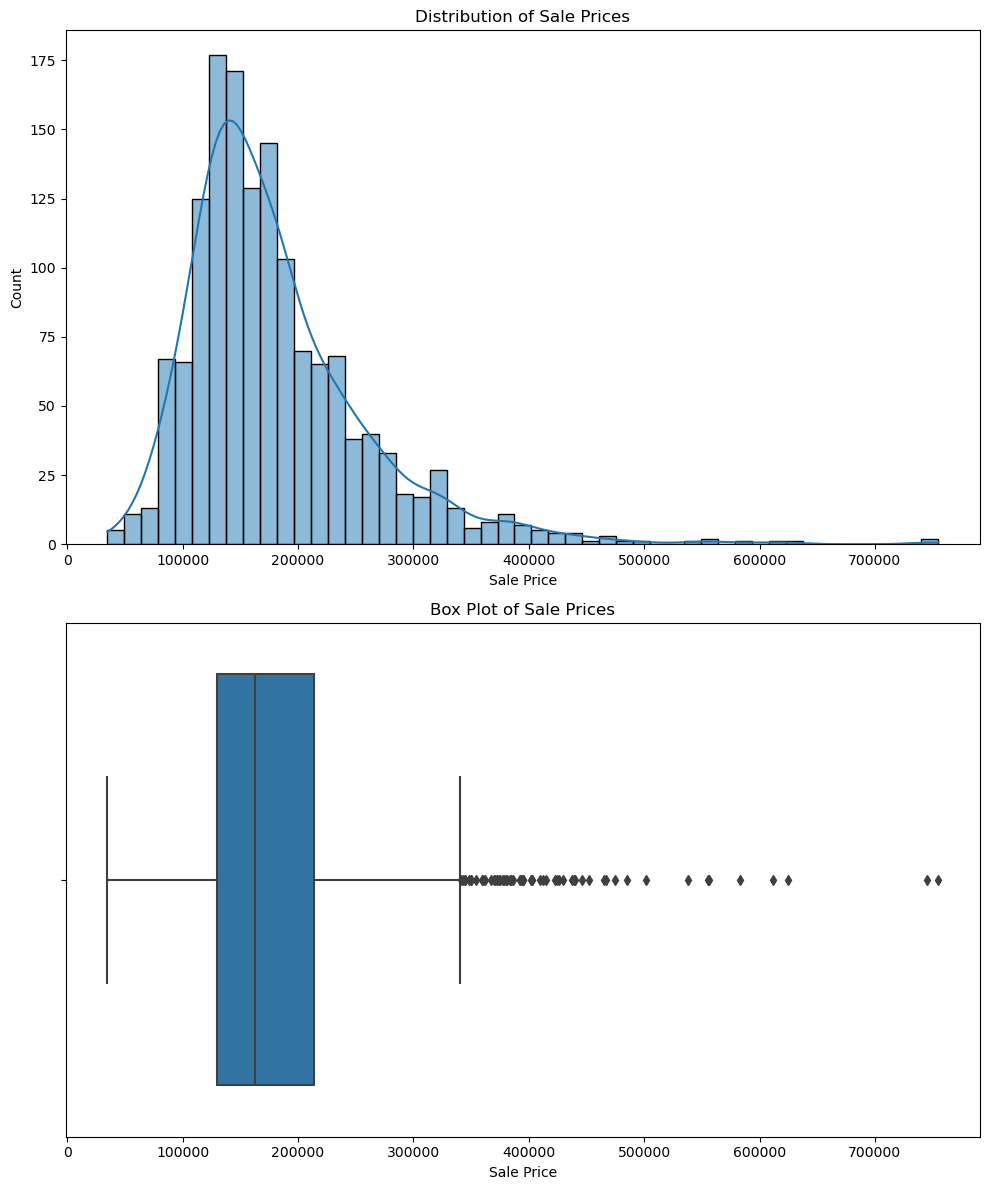

In [21]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Histogram of SalePrice
sns.histplot(data['SalePrice'], kde=True, ax=ax1)
ax1.set_title('Distribution of Sale Prices')
ax1.set_xlabel('Sale Price')
ax1.set_ylabel('Count')

# Box plot of SalePrice
sns.boxplot(x=data['SalePrice'], ax=ax2)
ax2.set_title('Box Plot of Sale Prices')
ax2.set_xlabel('Sale Price')

plt.tight_layout()
plt.show()

In [20]:
# Calculate summary statistics
summary_stats = data['SalePrice'].describe()
print('Summary Statistics of Sale Prices:')
print(summary_stats)

Summary Statistics of Sale Prices:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [27]:
#Checking Missing values in the Model features

print('Missing values:')
print(data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']].isnull().sum())

Missing values:
GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64


In [47]:

# Select relevant features
features = ['GrLivArea', 'FullBath', 'BedroomAbvGr', 'SalePrice']
df_subset = df[features]


In [48]:
# Check for missing values
print('Missing values:')
print(df_subset.isnull().sum())

Missing values:
GrLivArea       0
FullBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64


In [49]:
# Display basic statistics
print('Basic statistics:')
print(df_subset.describe())

Basic statistics:
         GrLivArea     FullBath  BedroomAbvGr      SalePrice
count  1460.000000  1460.000000   1460.000000    1460.000000
mean   1515.463699     1.565068      2.866438  180921.195890
std     525.480383     0.550916      0.815778   79442.502883
min     334.000000     0.000000      0.000000   34900.000000
25%    1129.500000     1.000000      2.000000  129975.000000
50%    1464.000000     2.000000      3.000000  163000.000000
75%    1776.750000     2.000000      3.000000  214000.000000
max    5642.000000     3.000000      8.000000  755000.000000


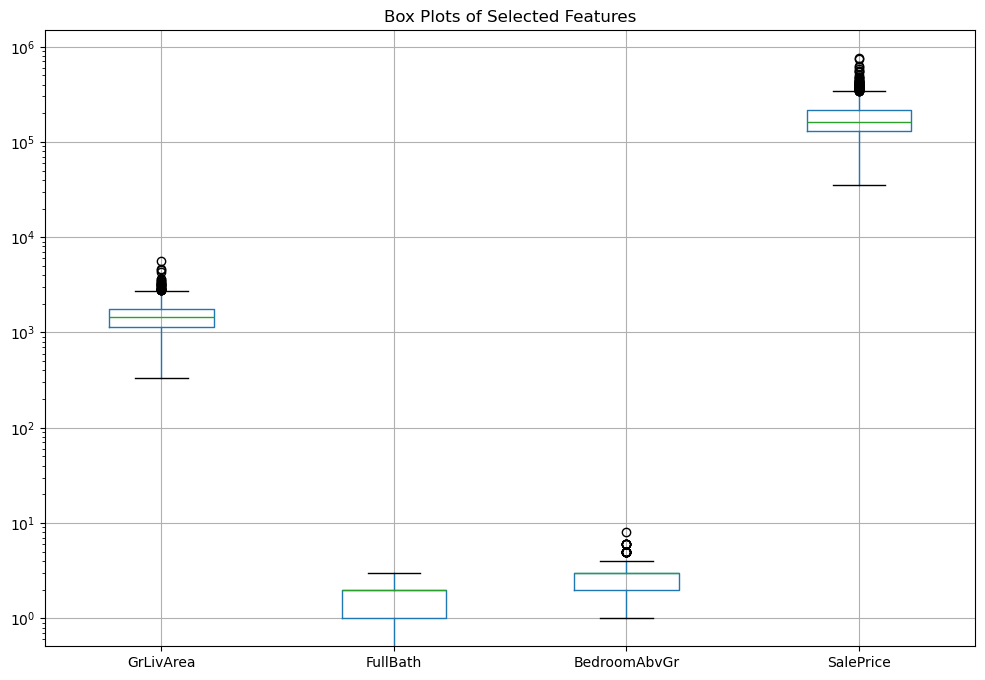

In [50]:
# Check for outliers using box plots
plt.figure(figsize=(12, 8))
df_subset.boxplot()
plt.title('Box Plots of Selected Features')
plt.yscale('log')
plt.show()

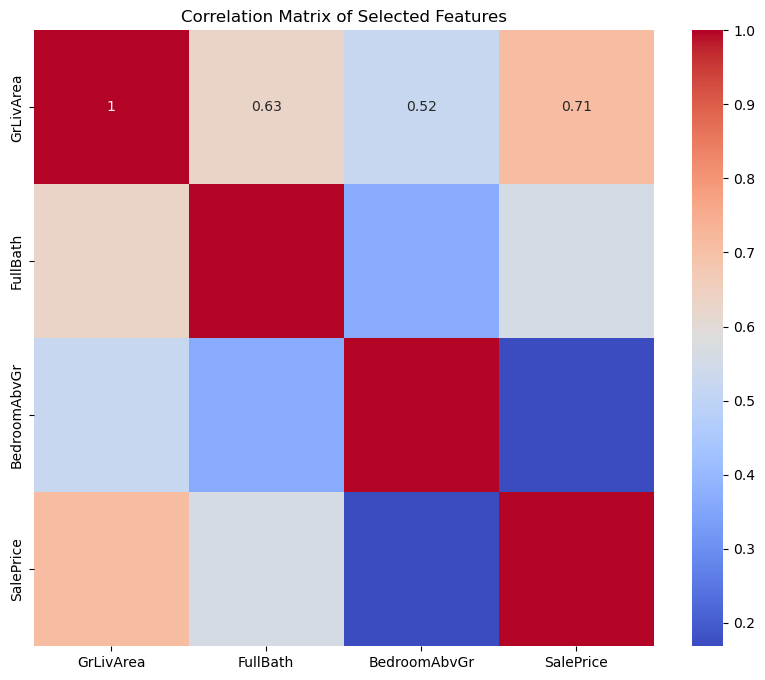

In [51]:
# Correlation matrix
correlation_matrix = df_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

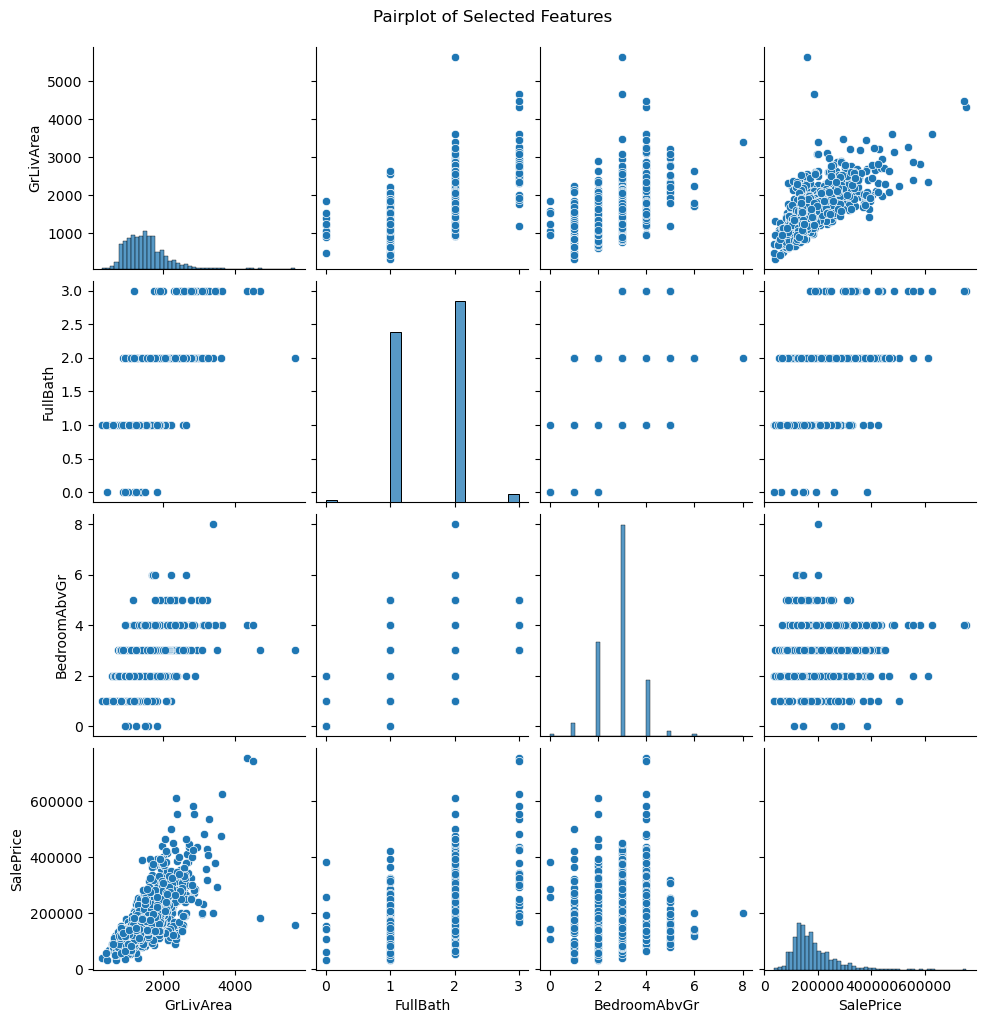

In [52]:
# Pairplot to visualize relationships
sns.pairplot(df_subset)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [31]:
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
y = data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Features shape:', X.shape)
print('Target shape:', y.shape)
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)



Features shape: (1460, 4)
Target shape: (1460,)
Training set shape: (1168, 4)
Testing set shape: (292, 4)


In [32]:
# Display the first few rows of the features
print('First few rows of features:')
print(X.head())

First few rows of features:
   GrLivArea  BedroomAbvGr  FullBath  HalfBath
0       1710             3         2         1
1       1262             3         2         0
2       1786             3         2         1
3       1717             3         1         0
4       2198             4         2         1


In [33]:
# Display summary statistics of the features and target variable
print('Summary statistics of features and target:')
print(pd.concat([X, y], axis=1).describe())

Summary statistics of features and target:
         GrLivArea  BedroomAbvGr     FullBath     HalfBath      SalePrice
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean   1515.463699      2.866438     1.565068     0.382877  180921.195890
std     525.480383      0.815778     0.550916     0.502885   79442.502883
min     334.000000      0.000000     0.000000     0.000000   34900.000000
25%    1129.500000      2.000000     1.000000     0.000000  129975.000000
50%    1464.000000      3.000000     2.000000     0.000000  163000.000000
75%    1776.750000      3.000000     2.000000     1.000000  214000.000000
max    5642.000000      8.000000     3.000000     2.000000  755000.000000


In [38]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [39]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([112217.01764971, 305769.10684585, 134851.72968815, 203697.6554177 ,
       225925.43719242, 121066.18312231, 206963.72433062, 187148.93496707,
       121066.18312231, 149891.75484177, 184673.66558809,  92480.89985855,
       121219.56585303, 190574.15441225, 210954.35539557, 132817.07836948,
       214006.33237358, 145635.38167713, 133224.00863321, 184877.13071995,
       217838.4820825 , 200781.09880219, 189183.58628574, 125492.33362225,
       179993.96755513, 183096.02693429, 170736.30405516, 118167.58887501,
       202205.35472527, 198661.10952216, 130935.80978152, 247171.148868  ,
       379209.392647  , 127120.05467719, 200849.14357156, 119134.8321332 ,
       201877.09603393, 208462.69141201, 241984.35576901, 119998.77506182,
       123204.13477055, 253682.03308776, 100212.57486952, 246764.21860426,
       104078.412375  , 205835.60706595, 123050.75203984, 100721.23769919,
       272604.29035144, 163218.7209791 , 104078.412375  , 220533.61119793,
       140837.55647367, 3

In [42]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse
r2 = r2_score(y_test, y_pred)
r2

0.6335301929422245

In [43]:

print('Model coefficients:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef:.2f}')

print(f'Intercept: {model.intercept_:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'R-squared score: {r2:.4f}')

Model coefficients:
GrLivArea: 101.73
BedroomAbvGr: -26704.01
FullBath: 30848.03
HalfBath: 4611.65
Intercept: 52830.65
Mean squared error: 2810942965.22
R-squared score: 0.6335


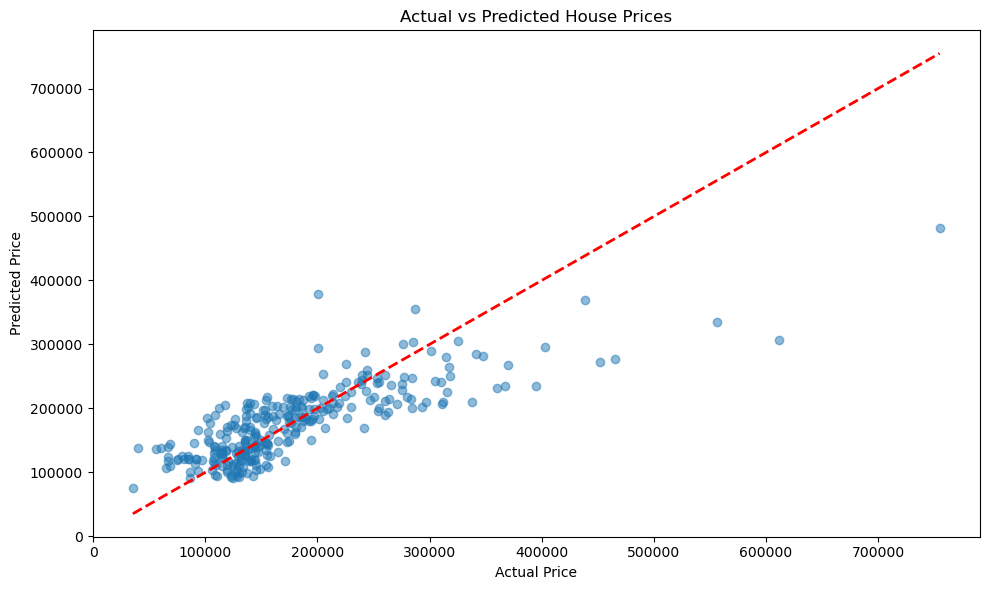

In [44]:
# Create a scatter plot of predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

In [46]:
# Print a sample of actual vs predicted prices
sample_size = 10
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
sample_actual = y_test.iloc[sample_indices].values
sample_predicted = y_pred[sample_indices]
print('Sample of Actual vs Predicted Prices:')
for actual, predicted in zip(sample_actual, sample_predicted):
    print(f'Actual: ${actual:.2f}, Predicted: ${predicted:.2f}, Difference: ${actual - predicted:.2f}')

Sample of Actual vs Predicted Prices:
Actual: $260000.00, Predicted: $251699.03, Difference: $8300.97
Actual: $207000.00, Predicted: $169476.06, Difference: $37523.94
Actual: $127000.00, Predicted: $100721.24, Difference: $26278.76
Actual: $107500.00, Predicted: $114403.48, Difference: $-6903.48
Actual: $264132.00, Predicted: $214327.92, Difference: $49804.08
Actual: $169990.00, Predicted: $168294.72, Difference: $1695.28
Actual: $287000.00, Predicted: $355939.66, Difference: $-68939.66
Actual: $181134.00, Predicted: $170736.30, Difference: $10397.70
Actual: $135500.00, Predicted: $149891.75, Difference: $-14391.75
Actual: $79500.00, Predicted: $125390.60, Difference: $-45890.60
